# Final Project
### Aidan Tucker | PHYS 105a

## ODE SciPy Simulation
In this class so far, we have learned many ways of how to numerically solve ODEs, both simple and chaotic systems. For this project, I wanted to learn how to simulate simple ODEs and use them to study the effects of drag in a viscous fluid environment. In this project, I simulated a simple linear second-order ODE which describes the evolution of a particle in the air subject to gravity and viscous resistance. Although this is a simple problem to solve and study analytically, I wanted to test some tools from the `scipy` library to simulate it numerically.

#### ODEInt
The SciPy `odeint()` function is nothing more than a black-box solver (i.e. it solves a specified problem without showing you the inner workings on how it got there). We can state the function describing a system, and SciPy will solve it automatically. This makes the use of this function very efficient and clean, but does limit its usefulness to very simple problems. This function uses the FORTRAN library ODEPACK, which is a frequently used collection of well-tested code that scientists and engineers have utilized for decades.

#### Solve_IVB
While `odeint()` is a powerful and useful tool, it has since been replaced by the more generic `scipy.integrate.solve_ivp()` since SciPy 1.0. The newer `solve_ivb()` includes a common API (Application Programming Interface) for several ODE solvers for Python, including the Euler method. While, in this project, I decided to use `odeint()` to simulate the scenario, many prefer to use `solve_ivb()`, and I am interested in further looking into why that is, and how it compares to the older `odeint()` function's use.

#### Scenario: Simulating v(x, y) of a Particle Undergoing Drag and Freefall
In this scenario, we have an object (represented by a point particle) of mass m = 1 kg being shot up and to the right. Using knowledge of drag force and freefall motion, and using the function `odeint` from the `scipy.integrate` package, the particle's motion is easily simulated and graphed out. Changing the value of the mass, m, the drag coefficient, k, and the initial velocities in the x and y direction, we can simulate different scenarios.

1. For this model, we need the NumPy, SciPy (specifically the `integrate` package), and matplotlib libraries.

In [1]:
# import files
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

2. To simulate the model, I first had to define a couple parameters.

In [2]:
m = 1. # mass of object
k = 1. # drag coefficient
g = 9.81 # acceleration due to gravity

3. In this model, we are using two variables for the dimensions (x and y). I will use a variable 'u' to denote '(x, y)'. The ODE simulated here is:

    u" = -kmu' + g

    To simulate this second-order ODE with SciPy, it must first be converted into a first-order ODE. In order to do this, we need to know two variables: u and u'. We can note that v = [u, u'], and that v' is a funtion of v. The next step is to define an initial vector v0 at time t=0, and give it four components: x, y, vx, and vy.

In [3]:
# initial position at (0,0)
v0 = np.zeros(4)

# orientation of init speed vector
v0[2] = 10
v0[3] = 10

4. We define a function 'f' that takes the vector v(t0) and a time t0 as arguments and returns with v'(t0).

In [4]:
def f(v, t0, k):
    # v has four components: v = [u, u']
    u, uprime = v[:2], v[2:]
    # compute u''
    udprime = -k / m * uprime
    udprime[1] -= g
    # v' = [u', u'']
    return np.r_[uprime, udprime]

5. Lastly, using SciPy's `odeint()` function from the `scipy.integrate` package, we simulate the system using different k values.

(0.0, 6.0)

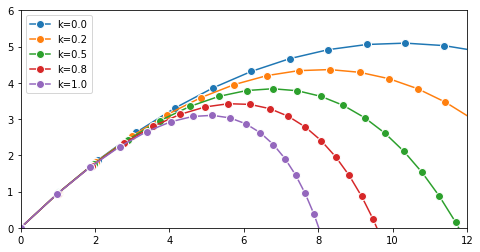

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# evaluate system 30 times between t=0 and t=3
t = np.linspace(0., 3., 30)

# input different values of k into the system
for k in np.linspace(0., 1., 5):
    # evaluate v for times t
    v = spi.odeint(f, v0, t, args=(k,))
    # plot trajectory
    ax.plot(v[:, 0], v[:, 1], 'o-', mew=1, ms=8, mec='w', label=f'k={k:.1f}')
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)

#### How This Method Works
In the scenario above, I let `u = (x, y)` represent the 2D position of the particle mass. The particle is influenced by two outside forces: gravity `mg = (0, -9.81 * m)` and the drag force due to air, which acts as a viscous fluid on the system, `F = -ku'`. The last term, u', depends on the particle's speed and is only valid at a low speed. With higher speeds, the expression would resemble something much more complex and nonlinear.

Then, using Newton's second law of motion, something we already covered in class, we know that `m * u" = F + mg`.

From this, we can determine our second-order ODE: `u" = -kmu' + g`.

Using `v = (u, u')` and `v' = (u', u") = (u', -kmu' + g)`, we can turn that second-order ODE into a first.

To numerically solve the ODE `y' = f(y)`, we approximate time with a step dt and replace y' with the first-order approximation `y'(t) ~= y(t + dt) - y(t)dt`.

Then, with an initial condition `y0 = y(t0)`, we can repeatedly evaluate y by the following: `y_(n+1) = y_n + dt * f(y_n)` with `t = n * dt, y_n = y(n * dt)`.

#### Analysis
The motion of the particle was much easier to manipulate and visualize using this sort of method of simulation. In the graph, the tallest curve (blue) represents the motion of a particle in complete freefall, simply affected by gravity. As drag is increased, however, the motion no longer sustains a parabolic motion, as it takes on a more "squished" path the more resistance is applied against its motion, and reaches the x-axis sooner. Additionally, shifting the mass to be greater yields smaller and smaller differences with the increase of k, and changing the angle of the initial speed reveals even more visually drastic changes when vx0 is increased.

The most fascinating thing about this sort of method is how easy it is to implement and use it to further experiment with the results. These tools are clean and simple, and made fiddling around with the numbers and scenario much easier, and required a minimal amount of steps. I tried using these tools in a few other similarly simple cases, including motion through liquids and simple harmonic problems, and in every case, the process was smooth and the steps were made simple. I think this sort of tool is remarkable, even if limited, and the scenario, though a simple one, was far easier to visualize or manipulate than in any of my previous experiences with drag in my other physics classes. `odeint()` is a tool that is very useful for simplifying and managing more straightforward ODEs so that you can focus on the problem at hand without having to put as much thought into the actual numerical steps to get the results you need, and can prove to be useful to carry some of the process when it comes to more complex situations that require more steps to solve.